# Analizing artist songs

We are going to analize songs from artists with the spotify API, in this case Taylor Swift's


## Get credentials from Spotify API

Go to your Spotify Dashboard at https://developer.spotify.com/dashboard/ and create a new application, then grab the Client ID and Client Secret Key.

In [1]:
# FILL IN THESE VALUES WITH YOUR OWN KEYS
client_id = ""
client_secret = ""

# Make sure to add this on "Edit Settings" in your Dashboard
redirect_uri = "http://localhost:9000"

Upon creating the Web App, you’ll need to go to “Edit Settings” and add a redirect URI, in our case, we aren’t hosting anything, so just set it to a localhost URL (make sure this doesn’t interfere with anything you have running locally, like Jupyter Notebook for instance).


# Connect with spotipy library

Next we will use the Spotipy library (which is a wrapper on the official REST API) to connect with the Spotify API directly with Python:

In [44]:
!pip install spotipy

In [3]:
import spotipy

In [4]:
from spotipy.oauth2 import SpotifyOAuth



Now we will connect, but we also need to define the scope of our App, do we want the app to be able to edit/create playlists? Or just read general information from Spotify? You can find a list of scopes here: https://developer.spotify.com/documentation/general/guides/authorization/scopes/


In [5]:


# Connect with API Keys created earlier
scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri))



 ## Test API

In [6]:
results = sp.current_user_recently_played()
type(results)


dict

In [7]:

for idx, item in enumerate(results['items']):
    track_id = item['track']
    track_name = track_id['name']
    # This assumes one artist name, but its a list for collabs
    artist_name = track_id['artists'][0]['name']

    print(f"{idx}.) {track_name} by {artist_name}")



0.) The Longest Wave by Red Hot Chili Peppers
1.) Aquatic Mouth Dance by Red Hot Chili Peppers
2.) Suck My Kiss by Red Hot Chili Peppers
3.) Goodbye Angels by Red Hot Chili Peppers
4.) Sick Love by Red Hot Chili Peppers
5.) I Ain't Goin' Out Like That by Cypress Hill
6.) If You Could Read My Mind by Gordon Lightfoot
7.) Renegades by X Ambassadors
8.) New Sensation by INXS
9.) Touch (feat. Paul Williams) by Daft Punk
10.) Woke The F*ck Up by Jon Bellion
11.) Rooftop Paradise - Live by Weval
12.) Little Voices by Lane 8
13.) Toba by Polynation
14.) Autumn by Ben Böhmer
15.) The Zephyr Song by Red Hot Chili Peppers
16.) Put Me to Work by Big Data
17.) On Top Of The World by Imagine Dragons
18.) Whatever It Takes by Imagine Dragons
19.) West Coast Poplock by Ronnie Hudson
20.) Reflections by Toshifumi Hinata
21.) Pinini Reggae by Sumo
22.) California Uber Alles by Dead Kennedys
23.) Whatever It Takes by Imagine Dragons
24.) Woke The F*ck Up by Jon Bellion
25.) Turn up the Radio by OK Go
26

# Taylor Swift Albums

In [8]:
taylor_swift = sp.artist('06HL4z0CvFAxyc27GXpf02')
taylor_swift

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 63098873},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

In [9]:
taylor_albums = sp.artist_albums(taylor_swift['id'], limit=50)

In [10]:
for album in taylor_albums['items']:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Album: Midnights (3am Edition) -- ID: 3lS1y25WAhcqJDATJK70Mq
Album: Midnights (3am Edition) -- ID: 4894htPwC6zoiuTqUQwn4I
Album: Midnights -- ID: 151w1FgRZfnKZA9FEcg9Z3
Album: Midnights -- ID: 4moVP48t9bji7djUc5VOvi
Album: Red (Taylor's Version) -- ID: 6kZ42qRrzov54LcAk4onW9
Album: Red (Taylor's Version) -- ID: 6x9s2ObPdpATZgrwxsk9c0
Album: Fearless (Taylor's Version) -- ID: 4hDok0OAJd57SGIT8xuWJH
Album: evermore (deluxe version) -- ID: 6AORtDjduMM3bupSWzbTSG
Album: evermore (deluxe version) -- ID: 1DT6fDJL6AWPJxe7Lq1dPb
Album: evermore -- ID: 2Xoteh7uEpea4TohMxjtaq
Album: evermore -- ID: 5jmVg7rwRcgd6ARPAeYNSm
Album: folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] -- ID: 0PZ7lAru5FDFHuirTkWe9Z
Album: folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] -- ID: 3VaaZ7OIbGLi60NVsnueoo
Album: folklore (deluxe version) -- ID: 1pzvBxYgT6OVwJLtHkrdQK
Album: folklore (deluxe version) -- ID: 7v7pe5vZQPWB5zW0JrKRiw
Album: folklo

# Cleaning the data

In [11]:
album_names = []
albums = []


for album in taylor_albums['items']:
    album_name = album['name']
    album_id = album['id']
    # Very ugly hacky code to clean out the duplicates, but it worked

    if album_name[:3] not in album_names and "remix" not in album_name and "Karaoke" not in album_name and "Live" not in album_name:
        album_names.append(album_name[:3])
        albums.append((album_name, album_id))


In [12]:
albums

[('Midnights (3am Edition)', '3lS1y25WAhcqJDATJK70Mq'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('1989 (Big Machine Radio Release Special)', '6EsTJnpahwW6xX20zvqQgZ'),
 ('Speak Now', '6Ar2o9KCqcyYF9J0aQP3au'),
 ('Taylor Swift', '5eyZZoQEFQWRHkV2xgAeBw'),
 ('Anti-Hero (Acoustic Version)', '5vgWXUueeEU2labRz6TlNv'),
 ('Carolina (From The Motion Picture “Where The Crawdads Sing”)',
  '5Bwg2XxrjTlrNy6BC7KQZf'),
 ('All Too Well (10 Minute Version) (The Short Film)',
  '2O1NYIBQCUobrL97A2Unk8')]

In [13]:
final_album_list = albums[:-5]
final_album_list

[('Midnights (3am Edition)', '3lS1y25WAhcqJDATJK70Mq'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('1989 (Big Machine Radio Release Special)', '6EsTJnpahwW6xX20zvqQgZ')]

# Songs from taylor's Albums

In [14]:
taylor_song_ids = []


for album_name, album_id in final_album_list:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        taylor_song_ids.append((album_name, album_id, track_name,track_id))

print(taylor_song_ids[0], len(taylor_song_ids))

('Midnights (3am Edition)', '3lS1y25WAhcqJDATJK70Mq', 'Lavender Haze', '4g2c7NoTWAOSYDy44l9nub') 186


# Song features

In [15]:
import pandas as pd

In [16]:


# Test out one song:
features = sp.audio_features(tracks=['4g2c7NoTWAOSYDy44l9nub'])



In [17]:
features

[{'danceability': 0.735,
  'energy': 0.444,
  'key': 10,
  'loudness': -10.519,
  'mode': 1,
  'speechiness': 0.0684,
  'acousticness': 0.204,
  'instrumentalness': 0.0012,
  'liveness': 0.17,
  'valence': 0.0984,
  'tempo': 97.038,
  'type': 'audio_features',
  'id': '4g2c7NoTWAOSYDy44l9nub',
  'uri': 'spotify:track:4g2c7NoTWAOSYDy44l9nub',
  'track_href': 'https://api.spotify.com/v1/tracks/4g2c7NoTWAOSYDy44l9nub',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4g2c7NoTWAOSYDy44l9nub',
  'duration_ms': 202396,
  'time_signature': 4}]

In [18]:
pd.Series(features[0])

danceability                                                    0.735
energy                                                          0.444
key                                                                10
loudness                                                      -10.519
mode                                                                1
speechiness                                                    0.0684
acousticness                                                    0.204
instrumentalness                                               0.0012
liveness                                                         0.17
valence                                                        0.0984
tempo                                                          97.038
type                                                   audio_features
id                                             4g2c7NoTWAOSYDy44l9nub
uri                              spotify:track:4g2c7NoTWAOSYDy44l9nub
track_href          

In [ ]:
df = pd.DataFrame()

# This will take awhile, due to us not using the batch feature
for album_name,album_id,track_name, track_id in taylor_song_ids:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)



In [ ]:
# Tranpose to fix concat issue due to axis=1
df = df.transpose().set_index('id')
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]


# Visualizing the songs

In [22]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [23]:
data_features = df.drop(['type','uri','track_href','analysis_url','album_name','album_id','track_name'],axis=1)

In [25]:
data_features.describe()[['danceability','energy','key','loudness','mode','speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,186.000,186.000,186,186.000,186,186.000,186.000
unique,155.000,162.000,12,183.000,2,156.000,174.000
top,0.627,0.634,0,-5.025,1,0.031,0.204
freq,4.000,3.000,37,2.000,164,5.000,2.000


In [26]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)
    

In [27]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.596871,0.514263,4.844086,-8.872392,0.881720,0.120328,0.426784
std,0.116883,0.193502,3.467594,3.107975,0.323811,0.226415,0.360557
min,0.292000,0.131000,0.000000,-16.219000,0.000000,0.025000,0.000191
25%,0.529500,0.354250,2.000000,-10.784750,1.000000,0.032325,0.059575
50%,0.606000,0.530000,5.000000,-8.541000,1.000000,0.041800,0.365000
75%,0.672250,0.685750,7.000000,-6.294500,1.000000,0.068350,0.812500
max,0.897000,0.909000,11.000000,-3.669000,1.000000,0.950000,0.971000



Plotting acoustic music quality

If you’re a true “Swiftie”, then you know some albums sound way more acoustic than others, let’s explore the data features to see if that is reflected in the data:


In [29]:
!pip install matplotlib

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

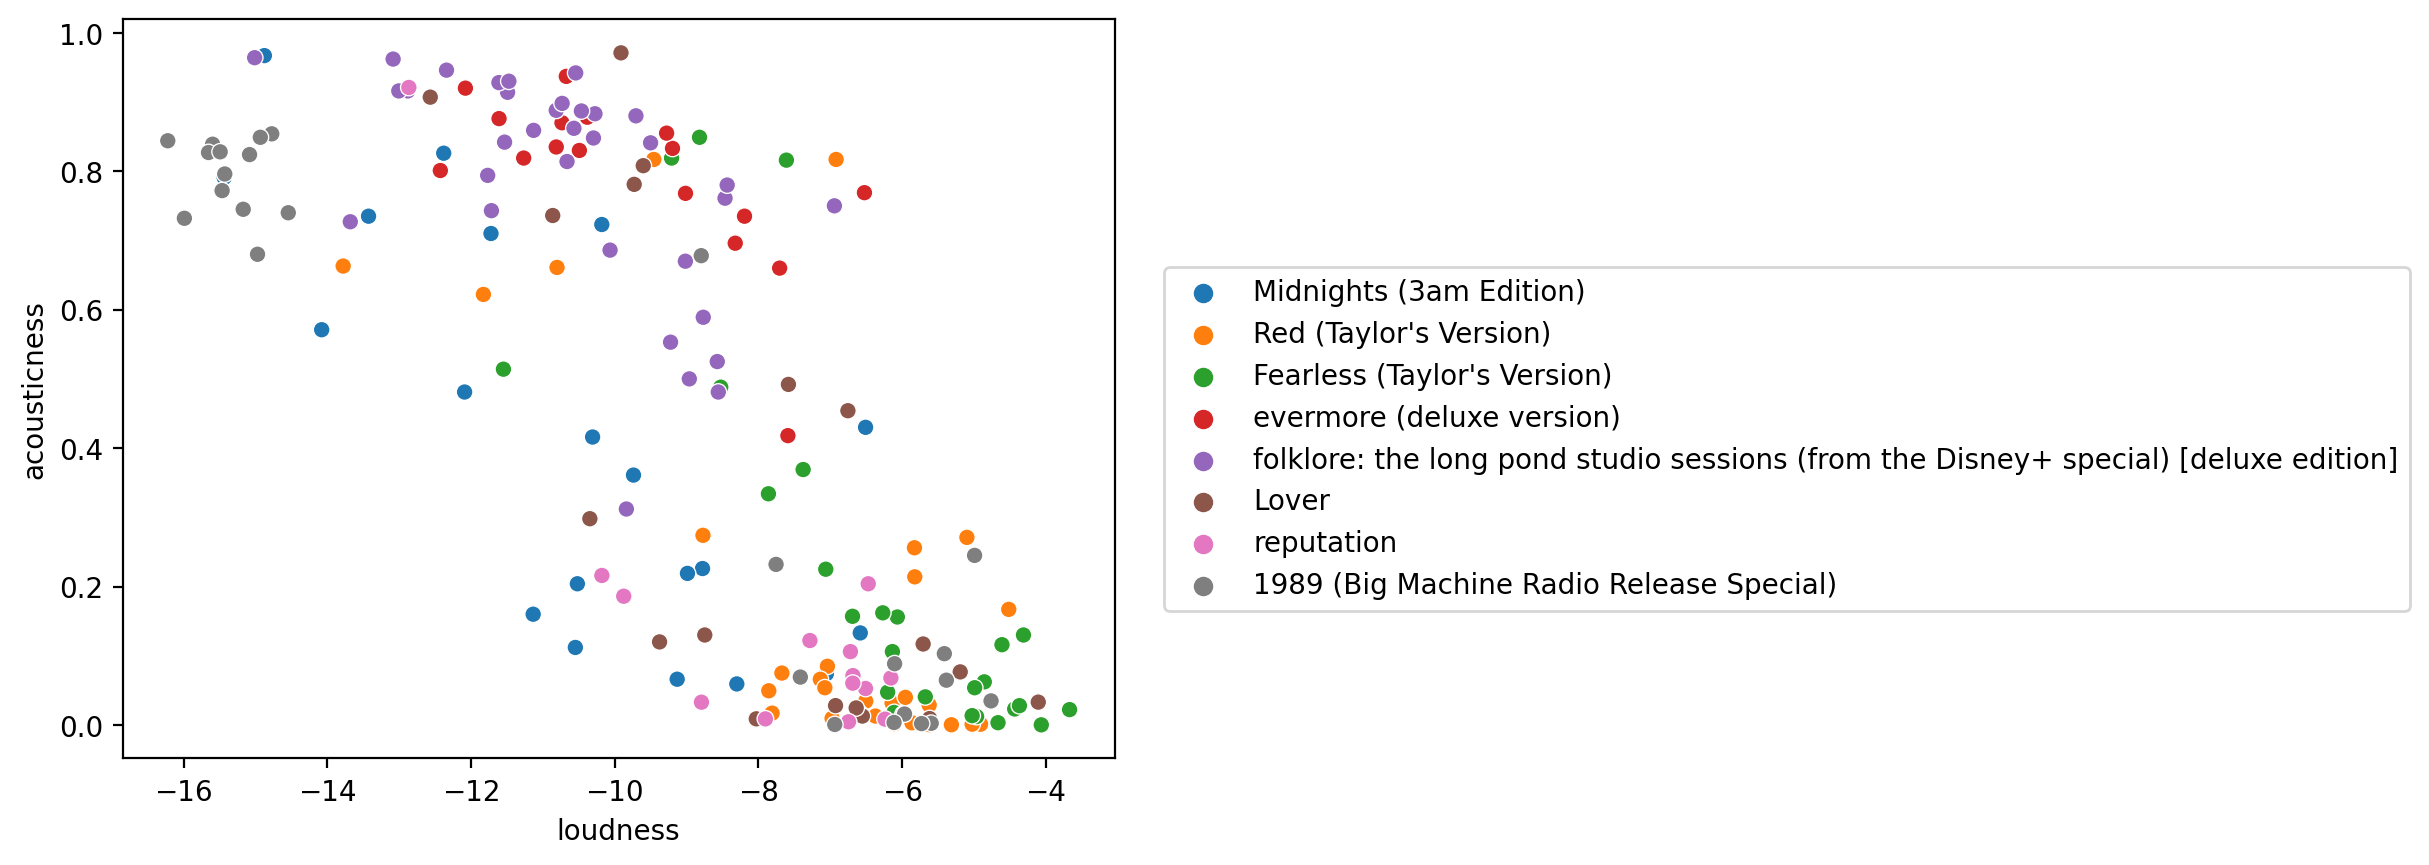

In [33]:
plt.figure(dpi=200)
sns.scatterplot(x='loudness',y='acousticness',data=data_features, hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

If you are familiar with Taylor’s albums, you can see that it makes sense that more folklore and evermore songs are higher on the “acousticness” feature spectrum and lower on the “loudness” feature.

It looks like “reputation” is one of the more distinct albums. Let’s explore Taylor’s songwriting range by finding her most distinct songs.

# Calculating Taylor’s Songwriting Range

Obviously there is a lot of variance in Taylor’s songwriting across albums, but what songs are the most different? We can calculate the euclidean distance between all the songs and then find the largest distance.

In [35]:
import scipy

In [36]:
distances = scipy.spatial.distance.cdist(data_features, data_features, metric='euclidean')


In [37]:
distances.shape

(186, 186)

Here we can see a heatmap of the distance between each song. Obviosly, each song will have 0 distance between itself (Which is the dark diagonal line you see). But what about this crazy range we see around the 48-50 id mark?

<AxesSubplot:>

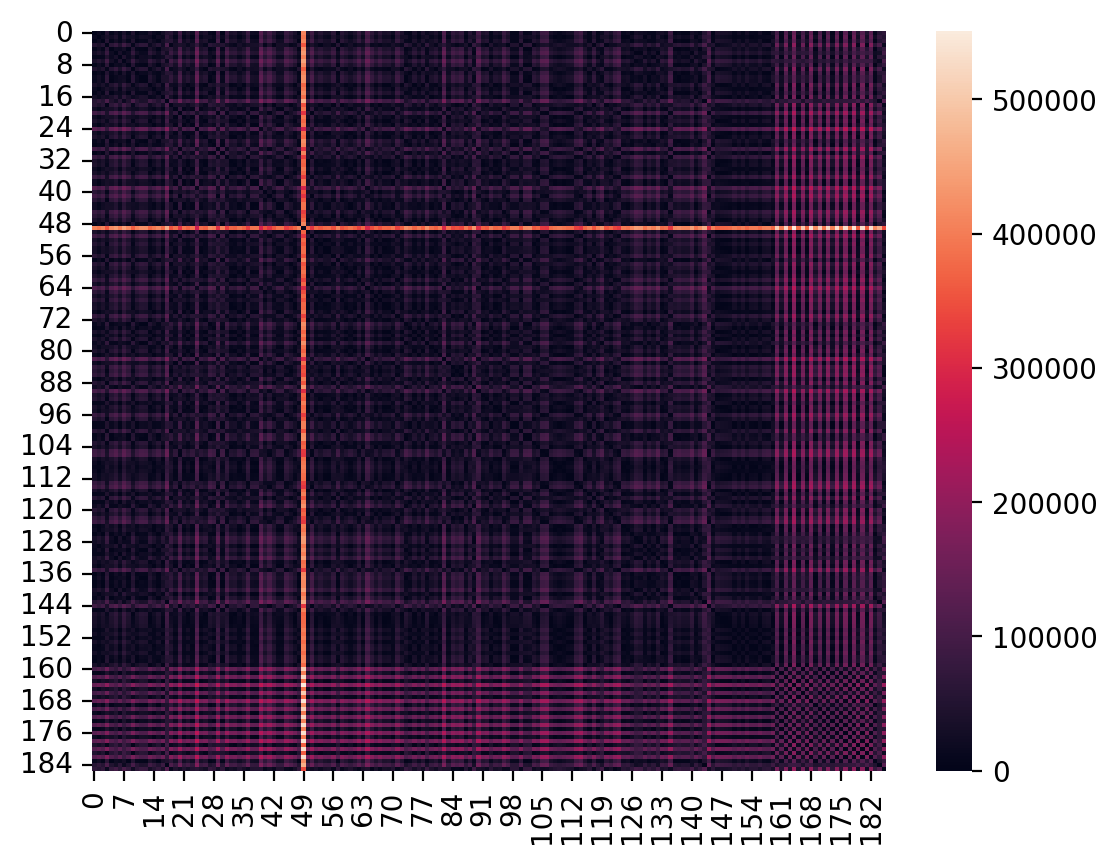

In [38]:
plt.figure(dpi=200)
sns.heatmap(distances)

In [39]:
df[distances==distances.max()][['album_name','track_name']]

,album_name,track_name
id,,
5enxwA8aAbwZbf5qCHORXi,Red (Taylor's Version),All Too Well (10 Minute Version) (Taylor's Ver...
4CyL8bBbVRYB0ogadF4aUS,1989 (Big Machine Radio Release Special),Style - Commentary


Looks like its “Glitch” from Midnights and “All Too Well (10 Minute Version) (Taylor’s Version)” from the album Red. So what’s the next step? Give both songs a quick listen, and you’ll notice they are actually not extremely different, except for the length of time. Could that have been a major feature? Let’s try dropping some data features and trying out this analysis again.

In [40]:
no_time = data_features.drop(['duration_ms','time_signature'], axis=1)
distances = scipy.spatial.distance.cdist(no_time, no_time, metric='euclidean')

In [41]:
distances.max()

140.85228039209588

In [43]:
df[distances==distances.max()][['album_name','track_name']]

,album_name,track_name
id,,
5jAIouBES8LWMiriuNq170,Red (Taylor's Version),State Of Grace (Acoustic Version) (Taylor's Ve...
1gaLZjPrDnHQWJds2Jg4KT,folklore: the long pond studio sessions (from ...,this is me trying - the long pond studio sessions




Interesting. My conclusion after listening to these songs? Given these features, its probably not useful to take such a mathematical approach on these songs, and instead, better to just listen and enjoy them!

Hope you found this interesting, check out our other blog posts for more fun analysis!
